## 데이터분석연습하기
### Ebay 휴대폰 판매데이터 예측 의사결정나무 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv

In [2]:
# 깃허브에서 'ebay' 데이터 바로 연동시키기

data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1


- BuyItNow : 바로 구매 할 수 있는지의 여부(즉시 구매)
- startprice : 경매의 시작 가격
- carrier : 통신사
- color : 기기 색상
- productline : 모델명
- noDescription : 판매자가 설명을 썼는지 안썼는지
- charCountDescriptio : 설명이 얼마나 긴지
- upperCaseDescription : 몇 문장인지
- sold : 팔렸는지 안팔렸는지 (우리가 알고자하는 종속변수)

제목 : 온라인 경매 아이템 판매 여부 예측





< 내가 이 데이터에서 추출할 내용 >
1) 즉시구매여부 --> 바로 sold out 되었는지 : BuyItNow , sold
2) 가장 높은 가격으로 팔린 기기의 색상, 모델명 : startprice , color , productline
3) 설명이 긴 기기가 높은 가격으로 팔렸는지 : charCountDescription , startprice
4) 

< To Do List >
1. 데이터 로딩
2. 전처리
3. EDA
4. Feature Engineering
5. 데이터분리 및 분석

In [3]:
data.head(30)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,NaN,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,NaN,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,NaN,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


# -------------------------------------------------------------

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


### 결측치 찾기 

In [6]:
data.isna()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,False,False,True,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1480,False,False,False,True,False,False,False,False,False
1481,False,False,True,False,False,False,False,False,False
1482,False,False,True,False,False,False,False,False,False
1483,False,False,True,False,False,False,False,False,False


In [7]:
data.isna().sum()

# 칼럼별 결측치 총 개수

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [8]:
len(data)

# 데이터 전체 개수

1485

In [9]:
# 결측치 / 전체데이터 * 100 = 결측의 비율

data.isna().sum() / len(data) * 100 

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

* 중요 : 'carrier' 칼럼의 결측치 78% 이기 때문에 칼럼 삭제해야 함(drop)

### 칼럼 'carrier' 결측치 처리하기

In [10]:
data['carrier']

0        NaN
1        NaN
2        NaN
3       AT&T
4        NaN
        ... 
1480    AT&T
1481     NaN
1482     NaN
1483     NaN
1484    AT&T
Name: carrier, Length: 1485, dtype: object

In [11]:
data[data['carrier'].isna() == True]

# 결측값만 True 로 나옴

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


In [12]:
# 결측값만 걸러내기

na_index = data[data['carrier'].isna() == True].index
na_index

Index([   0,    1,    2,    4,    5,    6,    7,    8,   10,   11,
       ...
       1473, 1474, 1475, 1476, 1477, 1478, 1479, 1481, 1482, 1483],
      dtype='int64', length=1169)

In [13]:
data.iloc[na_index]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


### 칼럼 'color' 결측치 처리하기

In [14]:
data['color']

0                White
1                  NaN
2                  NaN
3           Space Gray
4           Space Gray
             ...      
1480               NaN
1481    Midnight Black
1482        Space Gray
1483    Midnight Black
1484    Midnight Black
Name: color, Length: 1485, dtype: object

In [15]:
data[data['color'].isna() == True]

# 결측값만 True 로 나옴

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [16]:
# 결측값만 걸러내기

na_index = data[data['color'].isna() == True].index
na_index

Index([   1,    2,   21,   22,   25,   26,   27,   29,   30,   31,
       ...
       1455, 1456, 1459, 1464, 1465, 1467, 1471, 1472, 1477, 1480],
      dtype='int64', length=593)

In [17]:
data.iloc[na_index]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [19]:
data['carrier'] = data['carrier'].fillna('Unknown')

# 결측값 NaN 을 'Unknow'으로 채우기 

In [20]:
data['color'] = data['color'].fillna('Unknown')

# 결측값 NaN 을 'Unknow'으로 채우기 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [22]:
data.head(10)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,Unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Unknown,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,Unknown,White,Galaxy_S7,contains description,0,0,1
6,1,150.00,Unknown,White,Galaxy_S9,contains description,0,0,1
7,0,199.99,Unknown,Midnight Black,Galaxy_S9,no description,92,0,1
8,0,99.99,Unknown,White,Galaxy_S7,contains description,0,0,0
9,1,20.00,AT&T,Midnight Black,Galaxy_S7,no description,96,41,1


In [23]:
data['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [24]:
data['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [25]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [26]:
data['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

- BuyItNow : 바로 구매 할 수 있는지의 여부(즉시 구매)
- startprice : 경매의 시작 가격
- carrier : 통신사
- color : 기기 색상
- productline : 모델명
- noDescription : 판매자가 설명을 썼는지 안썼는지
- charCountDescriptio : 설명이 얼마나 긴지
- upperCaseDescription : 몇 문장인지   --> 굳이 필요한가? 
- sold : 팔렸는지 안팔렸는지 (우리가 알고자하는 종속변수)

범주형 변수를 명목형/서열형 변수로 바꾸기

- carrier            
- color                 
- productline           
- noDescription         

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


<Axes: xlabel='BuyItNow,sold'>

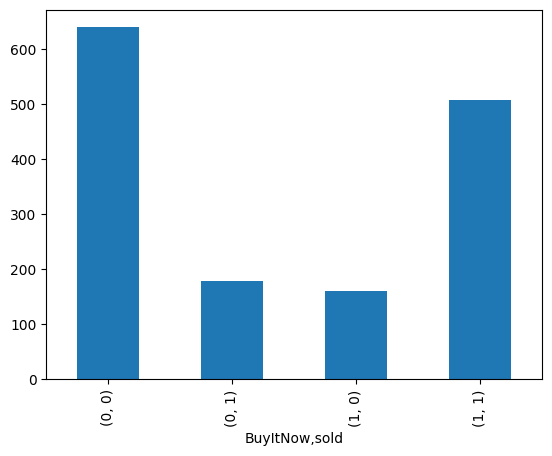

In [29]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False).plot(kind='bar')

In [30]:
data['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [31]:
# def em2num(x):
#     if x == "AT&T":
#         return 0
#     elif x == "Verizon":
#         return 1
#     else:
#         return 2

In [32]:
# data['carrier'] = data['carrier'].apply(em2num)
# data.info()

In [33]:
data['carrier'].value_counts()

carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [34]:
data['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [35]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


### 시각화하기 

<Axes: xlabel='BuyItNow'>

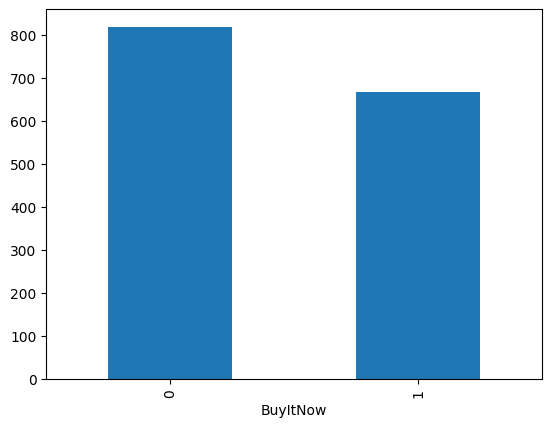

In [37]:
data['BuyItNow'].value_counts().plot(kind='bar')

<Axes: xlabel='startprice', ylabel='Count'>

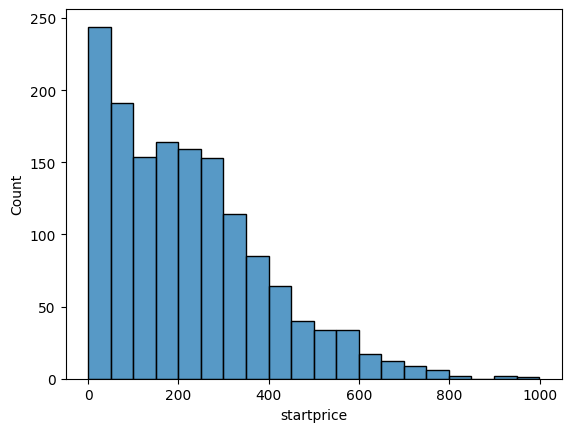

In [38]:
sns.histplot(data['startprice'], bins=20)

# 분포를 볼 수 있다. 

<Axes: xlabel='carrier'>

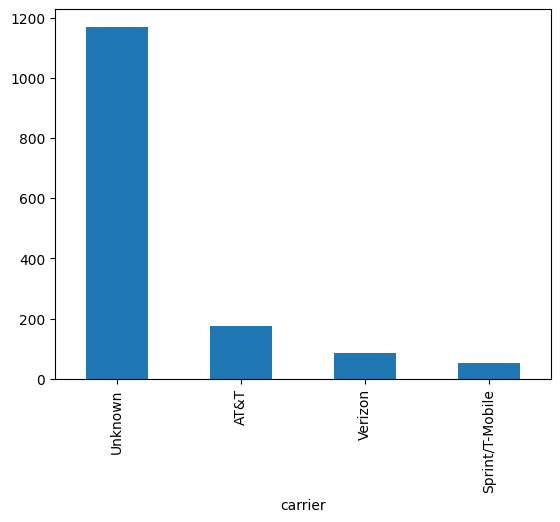

In [39]:
data['carrier'].value_counts().plot(kind='bar')

<Axes: xlabel='color'>

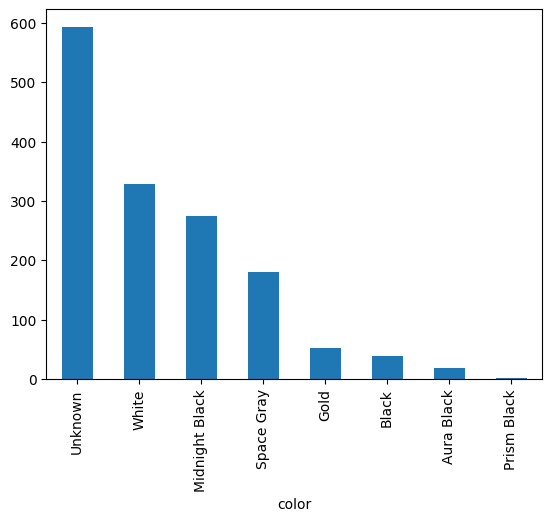

In [40]:
data['color'].value_counts().plot(kind='bar')

<Axes: xlabel='productline'>

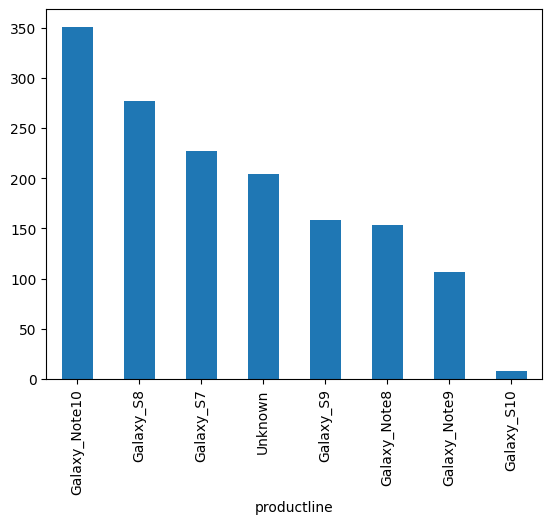

In [41]:
data['productline'].value_counts().plot(kind='bar')

<Axes: xlabel='noDescription'>

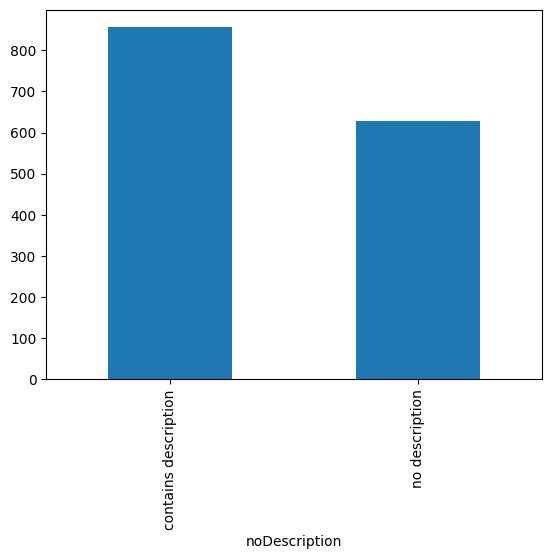

In [42]:
data['noDescription'].value_counts().plot(kind='bar')

<Axes: xlabel='sold'>

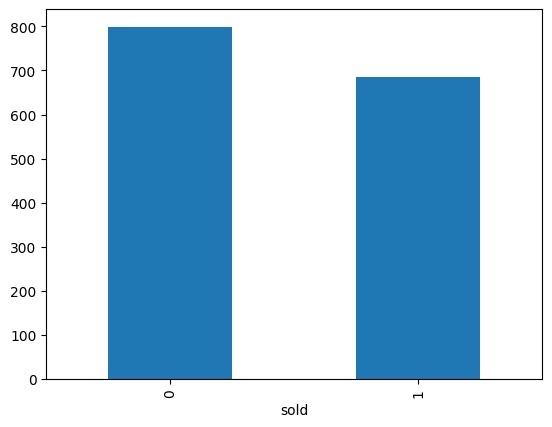

In [43]:
data['sold'].value_counts().plot(kind='bar')

C:\Users\5-05\AppData\Local\Temp\ipykernel_6316\493660837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['startprice'], bins=8)


<Axes: xlabel='startprice', ylabel='Density'>

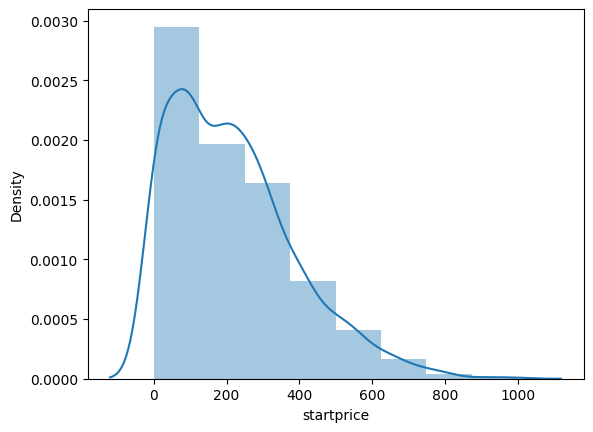

In [44]:
sns.distplot(data['startprice'], bins=8)

# 밀도를 표현함

< 내가 이 데이터에서 추출할 내용 >
1) 즉시구매여부 --> 바로 sold out 되었는지 : BuyItNow , sold
2) 가장 높은 가격으로 팔린 기기의 색상, 모델명 : startprice , color , productline
3) 설명이 긴 기기가 높은 가격으로 팔렸는지 : charCountDescription , startprice


In [45]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False)

데이터프레임을 Pclass 열을 기준으로 그룹화합니다. 즉, 탑승한 선실 등급별로 데이터를 나누는 작업을 수행합니다.

이 부분은 각 그룹 내에서 Survived 열의 값(생존 여부)이 얼마나 자주 발생했는지를 세어줍니다. value_counts() 함수는 기본적으로 데이터의 빈도를 계산합니다.

sort=False: value_counts()는 기본적으로 빈도가 높은 순으로 데이터를 정렬하지만, 여기서는 sort=False로 설정하여 원래 데이터의 순서를 유지합니다.

In [46]:
data[['productline', 'color']].groupby('productline').value_counts(sort=False)

productline    color         
Galaxy_Note10  Aura Black         19
               Gold               46
               Space Gray         91
               Unknown           119
               White              76
Galaxy_Note8   Gold                1
               Midnight Black     58
               Space Gray          2
               Unknown            48
               White              44
Galaxy_Note9   Black              10
               Space Gray         27
               Unknown            33
               White              37
Galaxy_S10     Gold                1
               Prism Black         1
               Space Gray          1
               White               5
Galaxy_S7      Midnight Black    111
               Space Gray          3
               Unknown            92
               White              21
Galaxy_S8      Midnight Black     59
               Space Gray         38
               Unknown           125
               White              55
Galaxy_S

<Axes: xlabel='productline,color'>

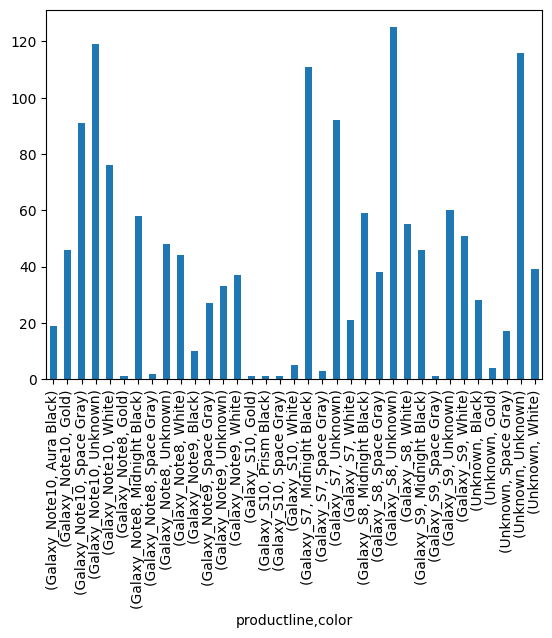

In [47]:
data[['productline', 'color']].groupby('productline').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='carrier,productline'>

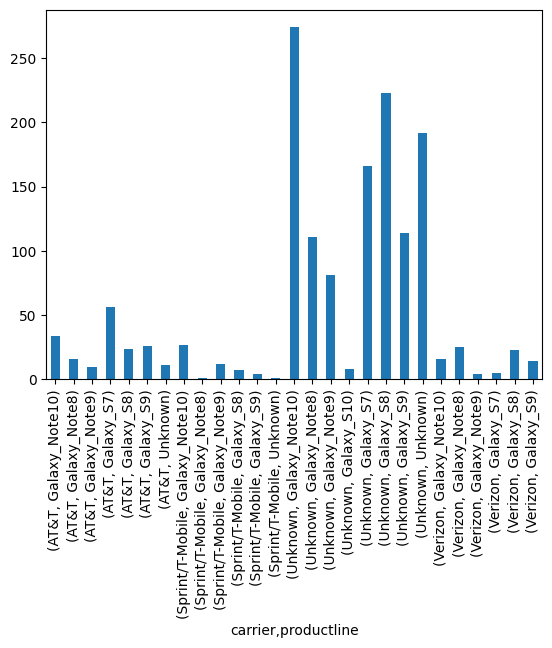

In [48]:
data[['carrier', 'productline']].groupby('carrier').value_counts(sort=False).plot(kind='bar')

data.groupby('Embarked')['Survived'].value_counts(sort=False)


이 코드는 각 Embarked 값(탑승한 항구)별로 Survived 값(생존 여부)의 빈도를 계산하여, 항구별 생존자와 사망자 수를 분석하는 데 유용합니다. 이를 통해 특정 항구에서 탑승한 승객의 생존율을 쉽게 파악할 수 있습니다.

In [49]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

<Axes: xlabel='BuyItNow,sold'>

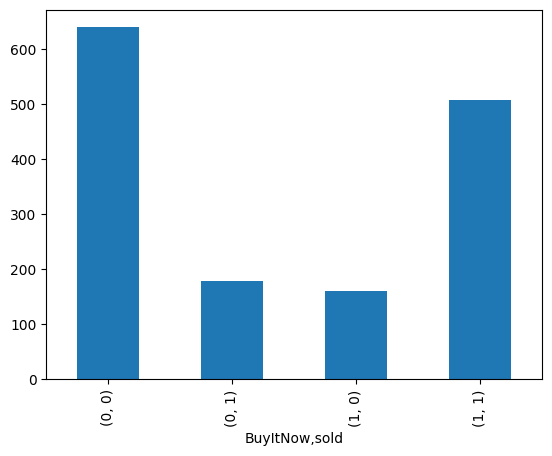

In [50]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False).plot(kind='bar')

* 1번줄 : 즉시구매하지 않겠다 - 고민하느라 아직 안삼 --> 구매욕 가장 낮은 사람들
* 2번줄 : 즉시구매하지 않겠다 - 바로 구매한 사람들 --> 왜 안사려다 바로 산걸까?
* 3번줄 : 즉시구매하겠다 - 바로 구매하지 않은 사람들 --> 왜 갑자기 구매를 망설여? 혹시 후기가 안좋나? 
* 4번줄 : 즉시구매하겠다 - 바로 구매함 --> 구매욕 가장 높은 사람들 

* buyitnow 0 : 즉시구매하지 않겠다 
* buyitnow 1 : 즉시구매하겠다
<br><br>
* sold 0 : 바로 팔리지 않음
* sold 1 : 바로 팔림

In [51]:
639+179+160+507

1485

In [52]:
data[['startprice','productline']].groupby('productline').value_counts(sort=False)

productline    startprice
Galaxy_Note10  0.99          20
               1.00           8
               1.99           1
               10.00          1
               24.99          1
                             ..
Unknown        590.00         1
               595.00         1
               599.00         1
               599.99         1
               700.00         2
Name: count, Length: 832, dtype: int64

In [53]:
data.groupby('carrier')['sold'].value_counts(sort=False)

# 통신사별 판매율 

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Unknown          0       629
                 1       540
Verizon          0        41
                 1        46
Name: count, dtype: int64

## * carrier 통신사
- 결측 비율이 높기 때문에 칼럼 자체를 삭제하는 것이 맞다. 

## * color 
- 애매해서 칼럼 삭제는 보류
- black 색깔 종류에도, Midnight Black / Prism Black / Aura Black / 그냥 Black 이렇게 4종류다. 그냥 black 하나로 묶어버리는 게 낫다.

In [54]:
data['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [61]:
data[['productline', 'color']].groupby('productline').value_counts()

# 기종 별 color 중 최빈값 

productline    color         
Galaxy_Note10  Unknown           119
               Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               Unknown            48
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Unknown            33
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               Unknown            92
               White              21
               Space Gray          3
Galaxy_S8      Unknown           125
               Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S

In [56]:
data[data['productline'] == 'Galaxy_Note9']

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
14,0,209.98,Unknown,White,Galaxy_Note9,no description,100,6,0
20,0,238.80,Unknown,Space Gray,Galaxy_Note9,no description,96,4,0
48,1,175.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1379,1,0.01,Unknown,Space Gray,Galaxy_Note9,contains description,0,0,1
1405,0,155.00,Unknown,White,Galaxy_Note9,no description,42,1,0
1420,0,149.95,Unknown,Unknown,Galaxy_Note9,no description,97,4,1
1424,0,319.98,Unknown,White,Galaxy_Note9,contains description,0,0,0


In [57]:
data.loc[data['productline'] == 'Galaxy_Note9', 'startprice'].describe()

count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: startprice, dtype: float64

In [60]:
data[data['color'] == 'Unknown']

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
21,0,84.99,AT&T,Unknown,Galaxy_S7,no description,16,15,1
22,0,249.99,Unknown,Unknown,Galaxy_S9,no description,101,2,0
25,0,185.00,Unknown,Unknown,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,Unknown,Unknown,Unknown,contains description,0,0,0
1471,0,329.99,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,Unknown,Unknown,Galaxy_S7,no description,70,10,0
1477,0,279.00,Unknown,Unknown,Unknown,contains description,0,0,0


* 각 기종별로 최빈값 색깔이 다르다. 
* 기종별로 많은 최빈값 색깔로 unknown 인 color 대체하기 


data.loc[(data['color'].isna() == True) & (data['productline'] == 'Galaxy_Note10'), 'color'] = Space Gray

In [64]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_Note10'), 'color'] = "Space Gray"

In [66]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_Note8'), 'color'] = "Midnight Black"

In [67]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_Note9'), 'color'] = "White"

In [68]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_S7'), 'color'] = "Midnight Black"

In [69]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_S8'), 'color'] = "Midnight Black"

In [70]:
data.loc[(data['color'] == 'Unknown') & (data['productline'] == 'Galaxy_S9'), 'color'] = "White"

In [71]:
data[['productline', 'color']].groupby('productline').value_counts()

productline    color         
Galaxy_Note10  Space Gray        210
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black    106
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              70
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    203
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black    184
               White              55
               Space Gray         38
Galaxy_S9      White             111
               Midnight Black     46
               Space Gray          1
Unknown        Unknown           116
               White              39
        

* black 색깔 종류에도, Midnight Black / Prism Black / Aura Black / 그냥 Black 이렇게 4종류다.
* 그냥 black 하나로 묶어버리는 게 낫다

In [72]:
data['color'].unique()

array(['White', 'Unknown', 'Space Gray', 'Midnight Black', 'Aura Black',
       'Gold', 'Black', 'Prism Black'], dtype=object)

In [73]:
for i in list(data['color'].unique()):
    print(i)

White
Unknown
Space Gray
Midnight Black
Aura Black
Gold
Black
Prism Black


In [74]:
for i in list(data['color'].unique()):
    if "Black" in i:
        print('Black')
    else:
        print(i)

White
Unknown
Space Gray
Black
Black
Gold
Black
Black
